In [1]:
import os
import numpy as np
import pandas as pd
import jax
import jax.numpy as jnp
import optax
import datasets
import models
import samplers
import matplotlib.pyplot as plt
from conv_emergence import compute_entropy as entropy
from localization.experiments import make_key, simulate
from viz_box import position_mean_var, ipr, entropy_sort, mean_sort, var_sort, plot_receptive_fields

In [4]:
config = dict(
    seed=0,
    num_dimensions=40,
    num_hiddens=100,
    init_scale=1.0,
    activation='tanh',
    model_cls=models.SimpleNet,
    optimizer_fn=optax.sgd,
    learning_rate=0.01,
    batch_size=100,
    num_epochs=1000,
    dataset_cls=datasets.SinglePulseDataset,
    xi1=(0.3, 0.35),
    xi2=(0.05, 0.1),
    class_proportion=0.5,
    sampler_cls=samplers.EpochSampler,
    init_fn=models.lecun_normal_init,
    save_=False,
)

In [5]:
weights, metrics = simulate(**config)

Using JAX backend: cpu

Using configuration:
{'activation': 'tanh',
 'batch_size': 100,
 'class_proportion': 0.5,
 'dataset_cls': <class 'datasets.single_pulse.SinglePulseDataset'>,
 'gain': None,
 'init_fn': <function lecun_normal_init at 0x14e6b5940>,
 'init_scale': 1.0,
 'kwargs': {},
 'learning_rate': 0.01,
 'model_cls': <class 'models.feedforward.SimpleNet'>,
 'num_dimensions': 40,
 'num_epochs': 1000,
 'num_hiddens': 100,
 'optimizer_fn': <function sgd at 0x14e5fb1a0>,
 'sampler_cls': <class 'samplers.base.EpochSampler'>,
 'save_': False,
 'seed': 0,
 'wandb_': False,
 'xi1': (0.3, 0.35),
 'xi2': (0.05, 0.1)}

kwargs: {'gain': None}
kwargs: {'gain': None}
Length of train dataset: 100000
Length of eval dataset: 1000
Length of train sampler: 100000
Length of eval sampler: 1000
Model:
SimpleNet(
  fc1=Linear(
    weight=f32[100,40],
    bias=None,
    in_features=40,
    out_features=100,
    use_bias=False
  ),
  act=<wrapped function <lambda>>
)

Starting evaluation...
Completed e

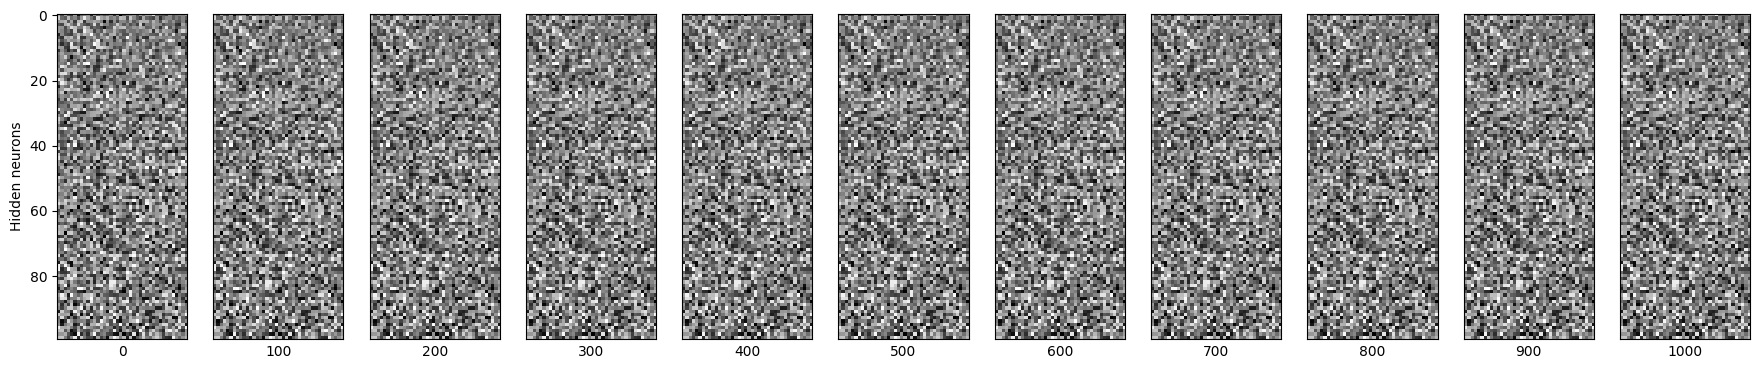

In [6]:
path_key = make_key(**config)
evaluation_interval = 100
# weights = np.load(f"results/weights/{path_key}/fc1.npy")
fig, axs = plot_receptive_fields(weights, num_cols=20, figsize=(40, 20), reordering_fn=entropy_sort, ind=-1, center_sort=True, evaluation_interval=evaluation_interval)
# fig.savefig(f"results/weights/{path_key}/receptive_fields.png", dpi=300, bbox_inches='tight')

In [11]:
key = jax.random.PRNGKey(42)
n = 10
dataset = datasets.SinglePulseDataset(key, num_exemplars=n, **config)
x, y = dataset[:n]

kwargs: {'seed': 0, 'num_hiddens': 100, 'init_scale': 1.0, 'activation': 'tanh', 'model_cls': <class 'models.feedforward.SimpleNet'>, 'optimizer_fn': <function sgd at 0x14e5fb1a0>, 'learning_rate': 0.01, 'batch_size': 100, 'num_epochs': 1000, 'dataset_cls': <class 'datasets.single_pulse.SinglePulseDataset'>, 'sampler_cls': <class 'samplers.base.EpochSampler'>, 'init_fn': <function lecun_normal_init at 0x14e6b5940>, 'save_': False}


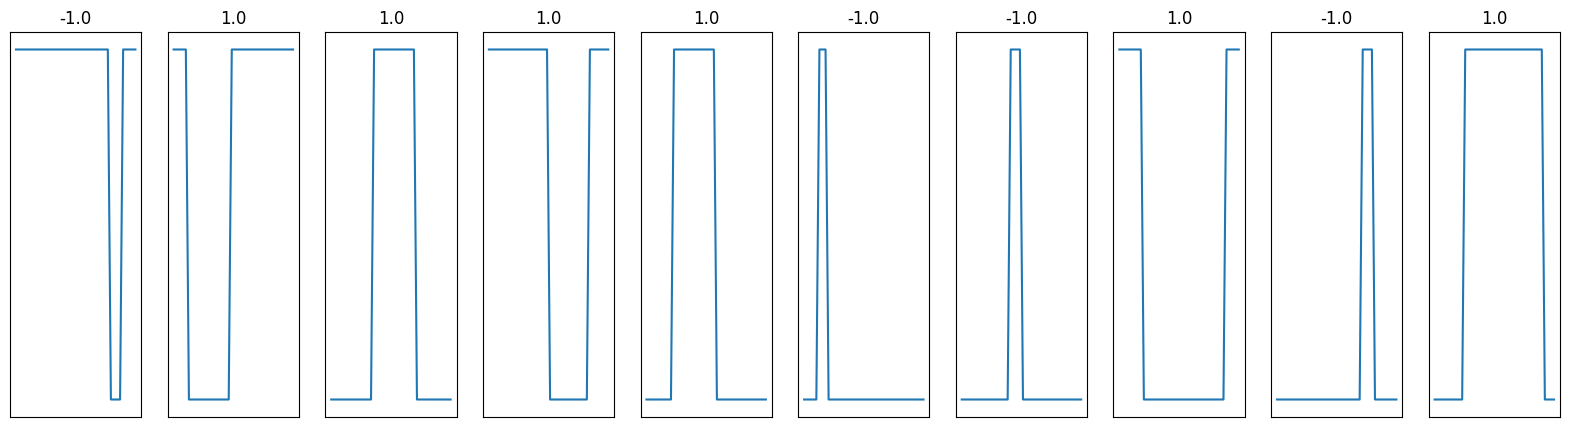

In [12]:
fig, axs = plt.subplots(1, n, figsize=(20, 5))
for i, ax in enumerate(axs.flatten()):
    ax.plot(x[i])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"{y[i]}")